## News Classification 

### Multiclass classification of News articles which are having classes 
### 1 -- World News, 
### 2 -- Sports News, 
### 3 -- Business News, 
### 4 --Science-Technology News


## Importing Libraries

In [6]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

## Reading Data

In [7]:
train_data=pd.read_csv("Data/train.csv",header=0,names=['category','title','desc'])

test_data=pd.read_csv("Data/test.csv",header=0,names=['category','title','desc'])

In [8]:
#Concatenating and dropping for news
train_data['news']=train_data['title']+train_data['desc']
train_data=train_data.drop(['title', 'desc'], axis=1)

train_data.head()


,category,news
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  120000 non-null  int64 
 1   news      120000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [10]:
#Concatenating and dropping for news
test_data['news']=test_data['title']+test_data['desc']
test_data=test_data.drop(['title', 'desc'], axis=1)

test_data.head()

,category,news
0,3,Fears for T N pension after talksUnions repres...
1,4,The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP)A...
3,4,Prediction Unit Helps Forecast Wildfires (AP)A...
4,4,Calif. Aims to Limit Farm-Related Smog (AP)AP ...


### where 1 is "World News", 2 is "Sports News", 3 is "Business News" and 4 is "Science-Technology News"

In [11]:
print("Shape of Training data is ",train_data.shape)
print("Shape of Testing data is ",test_data.shape)

Shape of Training data is  (120000, 2)
Shape of Testing data is  (7600, 2)


In [12]:
train_data.groupby("category").describe()

news                                                               
          count unique                                                top freq
category                                                                      
1         30000  30000  Bangladesh to ask Interpol to probe into grena...    1
2         30000  30000  Pedro should take Boston #39;s best pitchPedro...    1
3         30000  30000  Amazon Launch DVD Rental ServiceThe UK arm of ...    1
4         30000  30000  AOL offers its customers online shield free of...    1

## EDA

<AxesSubplot:xlabel='category', ylabel='count'>

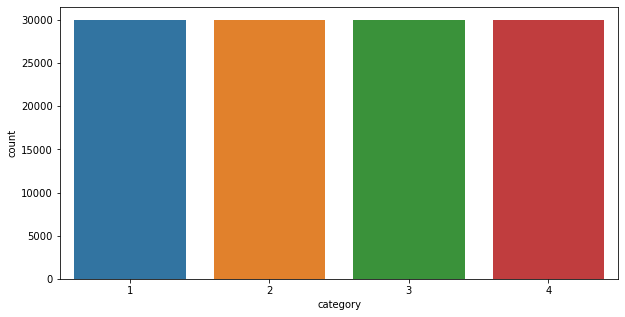

In [13]:
# Ploting some graphs to understand data

sns.countplot(train_data.category)

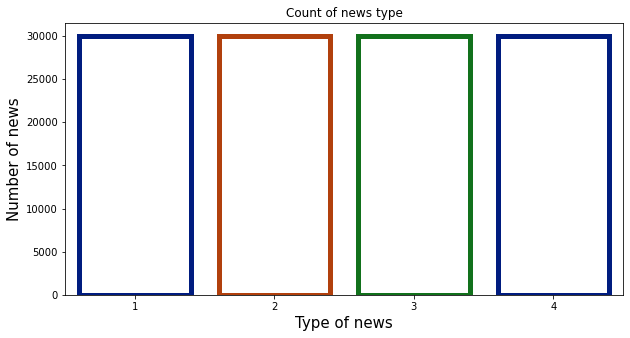

In [14]:
#Plotting the frequency plot
ax = sns.countplot(x="category", data=train_data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

### Remove StopWords

In [15]:
#Method to remove stopwords from the data

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words



### Remove Punctuation

In [16]:
import string
#A punctuations string for reference (added other valid characters from the dataset)

all_punctuations = string.punctuation + '‘’,:”][],' 

#Method to remove punctuation marks from the data

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct



### Lemmatization

In [17]:
#Method to lemmatize the words in the data

lemmer = nltk.stem.WordNetLemmatizer()

def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])


In [18]:
#Method to perform a complete cleaning

def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw.lower()))
    return lem(cleaned_text)


In [19]:
#Testing the cleaner method
text_cleaner("Hi!, this is a sample text to test the text cleaner method. Removes *@!#special characters%$^* and stopwords. And lemmatizes, go, going - run, ran, running")

'hi sample text test text cleaner method remove special character stopwords lemmatizes go go run run run'

In [20]:
#Applying the cleaner method to the entire data
train_data['news'] = train_data['news'].apply(text_cleaner)
train_data.sample(3)

,category,news
105514,3,us gdp rise fail halt cautionincreased spend c...
47516,4,halflife 2 date 26th novembereurogamer report ...
14268,1,iran iraq want bury pasttehran aug 29 iran ira...


In [21]:
# def review_cleaning(text):
#     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
#     and remove words containing numbers.'''
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     return text


# clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
# clean_news.head()

### N-Gram Analysis

In [22]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


#Calling function and return only top 20 words
common_words = get_top_n_words(train_data['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

39s 31163
say 28310
new 19086
us 18129
company 9771
first 8973
reuters 8779
two 8446
apap 7691
report 7424
monday 7408
game 7295
wednesday 7283
tuesday 7223
thursday 7101
make 7001
world 6955
oil 6905
take 6883
one 6737


In [23]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(train_data['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

new york 4491
oil price 2663
unite state 2459
prime minister 2258
york reuters 2189
world 39s 1491
say tuesday 1487
say monday 1478
red sox 1452
say wednesday 1414
say thursday 1413
officials say 1359
say friday 1256
last week 1193
chief executive 1124
sport network 1122
last night 1078
president bush 1076
first time 1053
wall street 1046


In [24]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(train_data['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

new york reuters 2127
quote profile research 1021
world 39s largest 469
boston red sox 457
canadian presscanadian press 451
faceverdanams sans serifarialhelvetica 416
sans serifarialhelvetica size2 416
new york yankees 403
york reuters stock 401
prime minister ariel 340
securities exchange commission 337
president george bush 322
minister ariel sharon 315
minister tony blair 287
prime minister tony 265
san francisco reuters 259
international space station 255
president vladimir putin 247
reuters oil price 245
ltfont faceverdanams sans 244


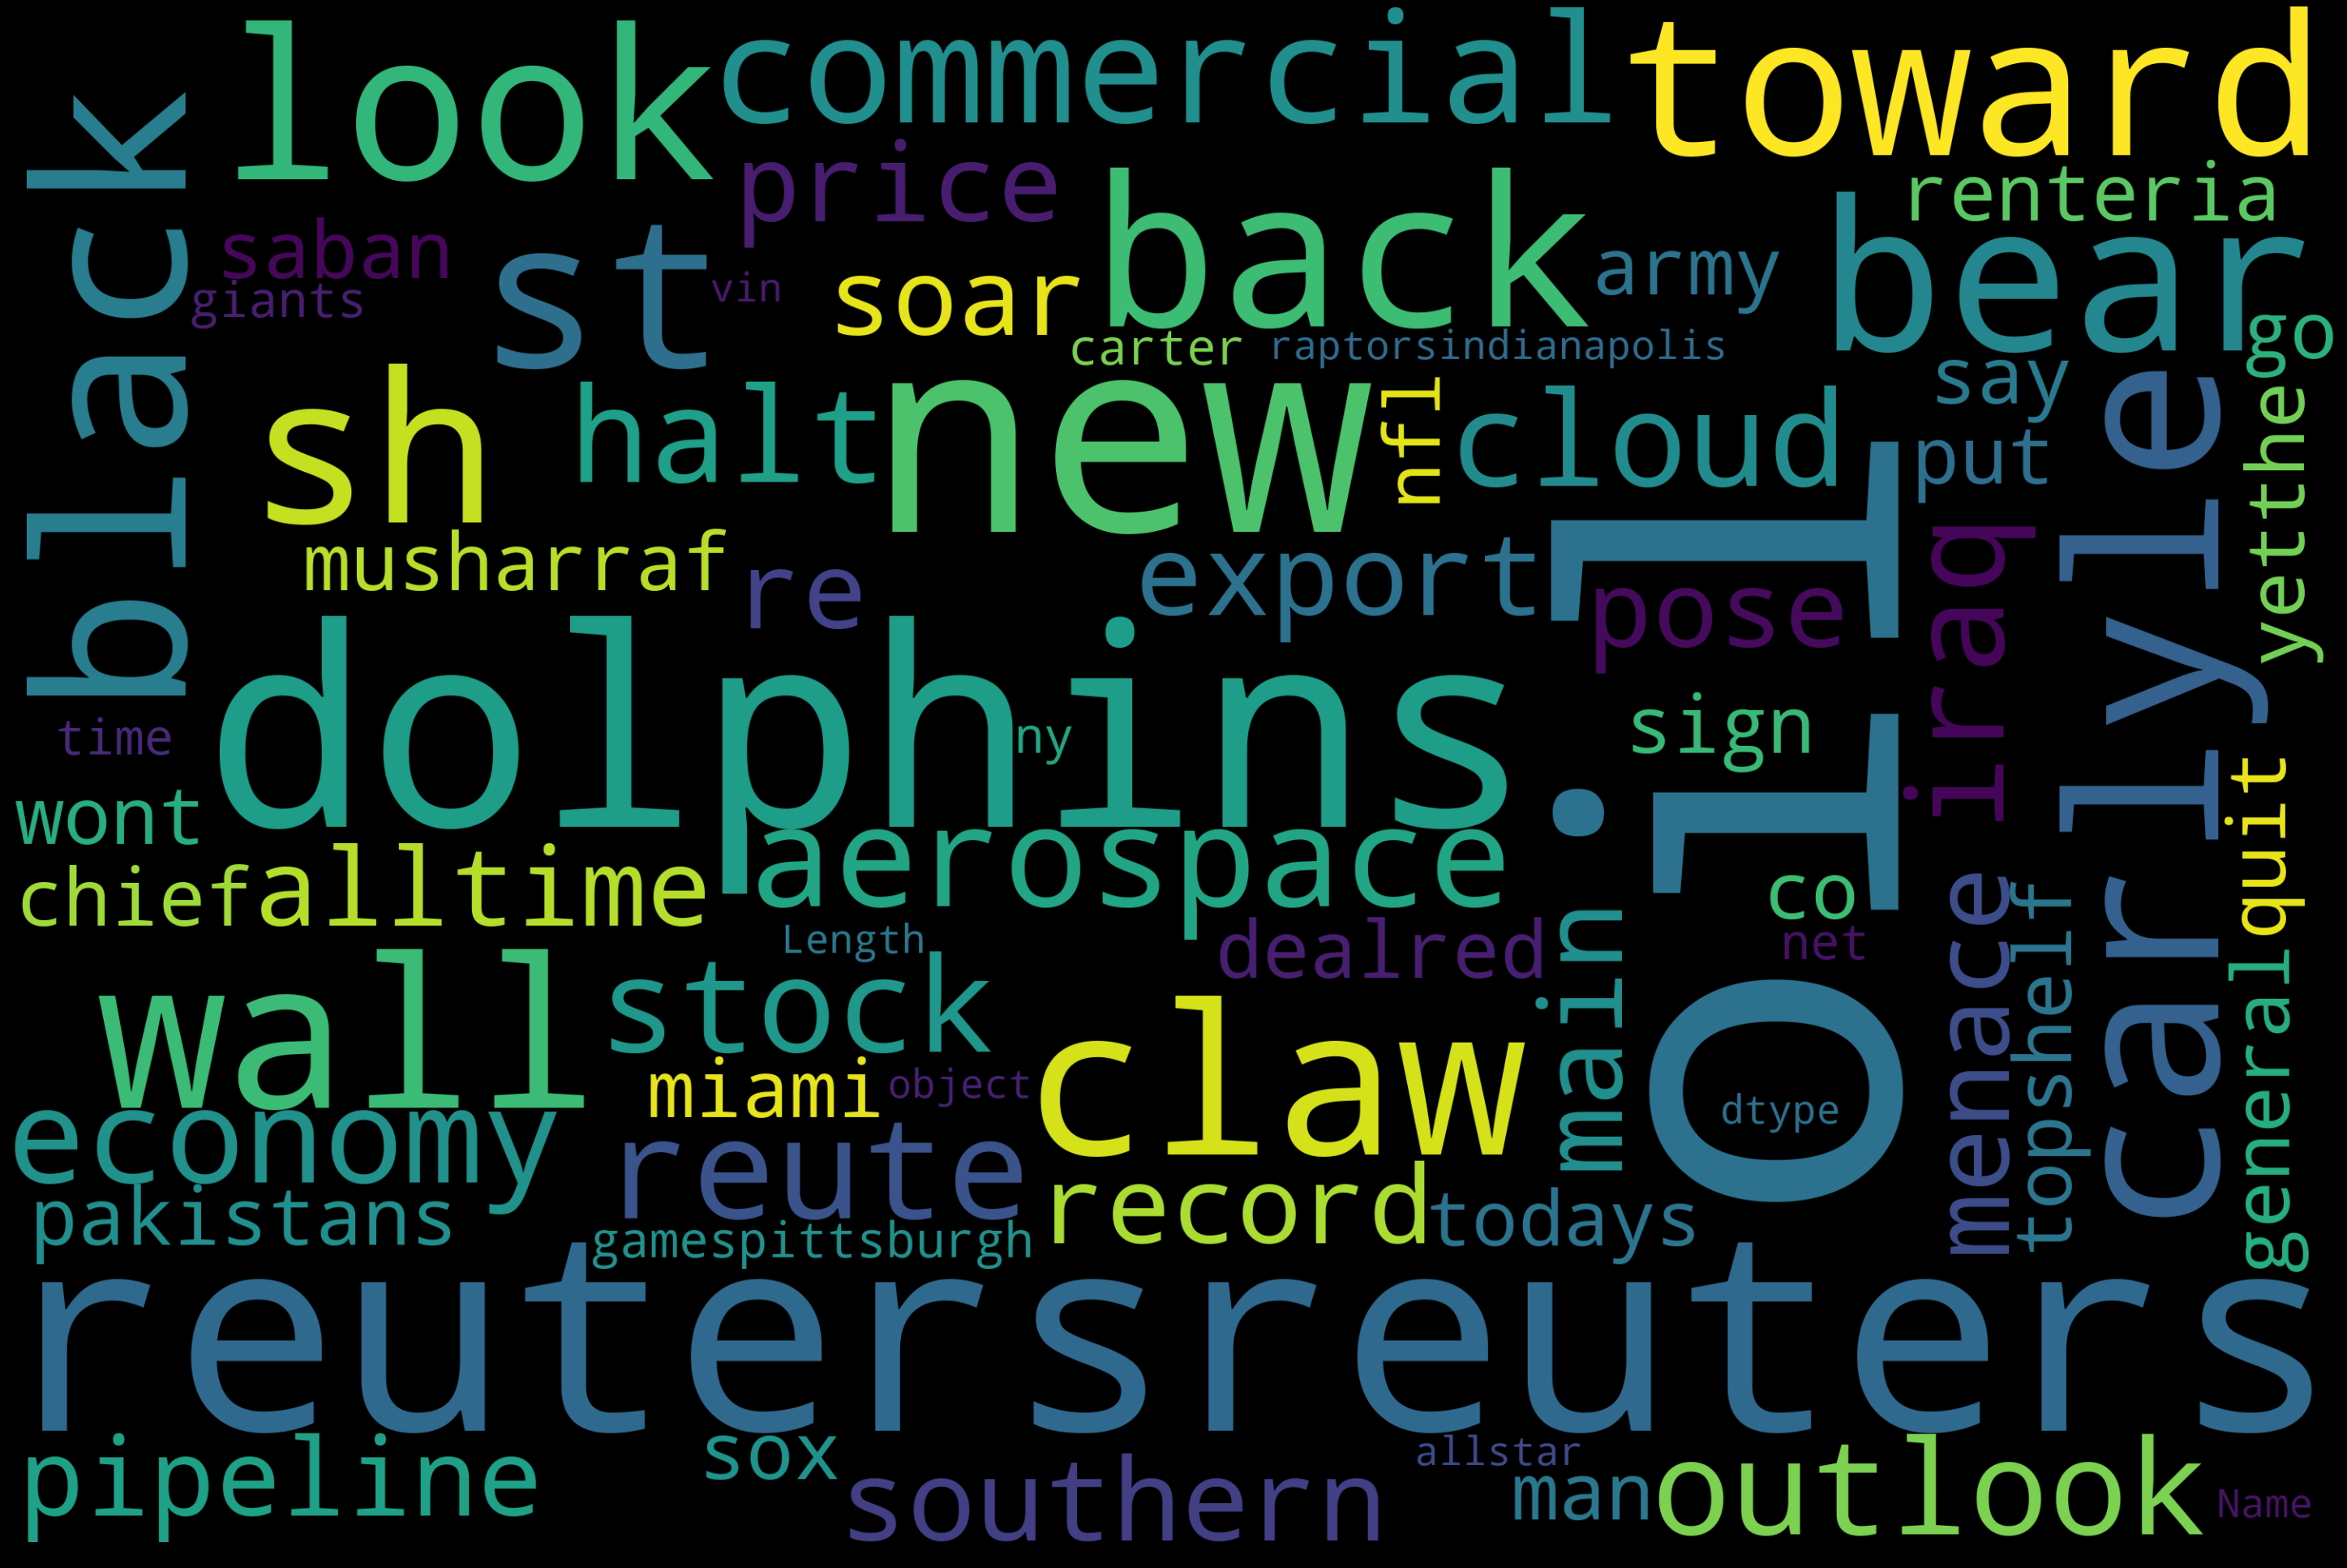

In [25]:
text = train_data["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
#Extracting 'reviews' for processing
news_features=train_data.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,wall st bear claw back black reutersreuters sh...
1,carlyle look toward commercial aerospace reute...
2,oil economy cloud stock outlook reutersreuters...
3,iraq halt oil export main southern pipeline re...
4,oil price soar alltime record pose new menace ...


In [27]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(2,2))

# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(120000, 6000)

In [29]:
#Getting the target variable
y=train_data['category']

In [41]:
X_train, y_train = X,y
test_x = tfidf_vectorizer.fit_transform(test_data['news'])
test_y=test_data['category']

# train_x=news_features.news
# test_x=test_data.news
# train_y=train_data.category
# test_y=test_data.category

In [31]:
# pd.DataFrame(train_arr[:100], columns=tfidf_vectorizer.get_feature_names())


In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8036583333333333
Decision Tree Test Accuracy: 0.7420666666666667
KNN Test Accuracy: 0.6807833333333333
Naive Bayes Test Accuracy: 0.789175


In [42]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(test_x,test_y))

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.2644736842105263


In [43]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(test_x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))

Accuracy of logistic regression classifier on test set: 0.27


Confusion matrix, without normalization


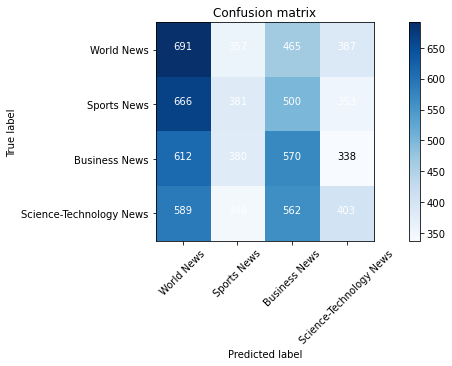

In [45]:
cm = metrics.confusion_matrix(test_y, y_pred)
plot_confusion_matrix(cm,classes=['World News','Sports News','Business News','Science-Technology News'])

In [46]:
print("Classification Report:\n",classification_report(test_y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.36      0.31      1900
           2       0.26      0.20      0.23      1900
           3       0.27      0.30      0.29      1900
           4       0.27      0.21      0.24      1900

    accuracy                           0.27      7600
   macro avg       0.27      0.27      0.27      7600
weighted avg       0.27      0.27      0.27      7600



In [47]:
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')